1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
['1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-

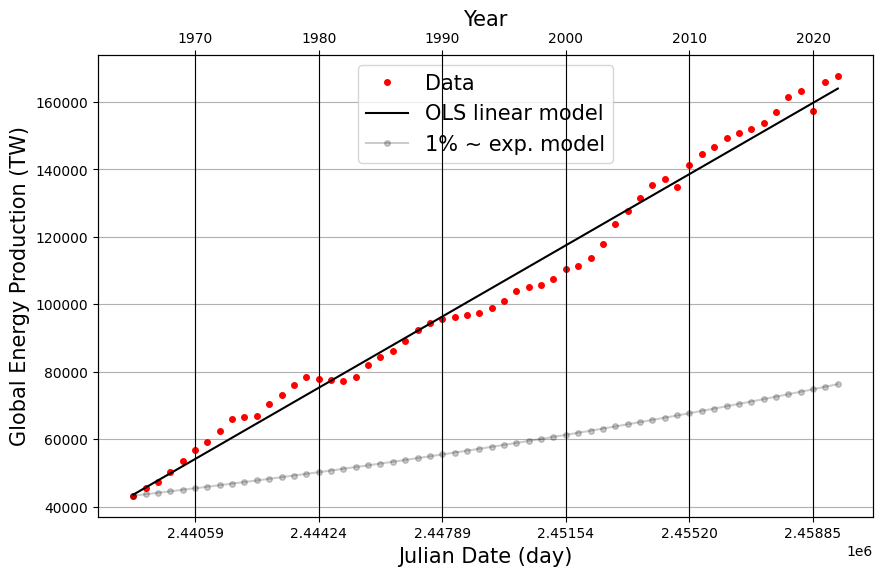

 The slope is 5.78096916255204
 The intercept is -14054783.607320864
The slope is 5.7809691626384385+/- 0.08824938162412382
The intercept is -14054783.607531475+/- 216138.47851751046
The r_squared is 0.9871181218051172
 y=5.78096916255204 * x + -14054783.607320864
jd of TYPEII Kardashev = 69192552806872.516
jd TYPEII Sagan = 17298140025129.984


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import json
from astropy.time import Time

# Load data
with open('/home/sebaguro/Downloads/owid-energy-data_jul2023_18th.json') as f:
  data = json.load(f)
world_dict=data['World']
energy_mores_cons=[]
# convert years to string with '-01-01' appended (assuming you mean the start of each year)
years=[]
for i in range(65,123):

    energy=world_dict['data'][i]['primary_energy_consumption']
    energy=float(energy)
    energy_mores_cons.append(energy)
    year=world_dict['data'][i]['year']
    years.append(year)
    print(year)
time_str = [str(year) + '-01-01' for year in years]
print(time_str)
d = {'Power (TJ/s)': energy_mores_cons}
df = pd.DataFrame(data=d)
df['year']=[i+1964 for i in range(1,59)]
df['year']=df['year'].astype(float)

P_0 = df['Power (TJ/s)'][0]
# Growth rate
r = 0.01
#years = np.arange(0, 58)
years= Time(time_str, format='iso', scale='utc').jyear
power = P_0 * (1 + r)**(years-1965)

jd_times = Time(time_str, format='iso', scale='utc').jd


# converted years to string with '-01-01' appended (assuming you mean the start of each year)
#used ASTROPY TIME
#time_str = [str(year) + '-01-01' for year in years]
#print(time_str)
# Convert to Julian Dates (which will be the same as Heliocentric Julian Dates for Earth)
#jd_times = np.array([2438761.5, 2439126.5, 2439491.5, 2439856.5, 2440222.5, 2440587.5, 2440952.5,
#                                2441317.5, 2441683.5, 2442048.5, 2442413.5, 2442778.5, 2443144.5, 2443509.5,
#                                2443874.5, 2444239.5, 2444605.5, 2444970.5, 2445335.5, 2445700.5, 2446066.5,
#                                2446431.5, 2446796.5, 2447161.5, 2447527.5, 2447892.5, 2448257.5, 2448622.5,
#                                2448988.5, 2449353.5, 2449718.5, 2450083.5, 2450449.5, 2450814.5, 2451179.5,
#                                2451544.5, 2451910.5, 2452275.5, 2452640.5, 2453005.5, 2453371.5, 2453736.5,
#                                2454101.5, 2454466.5, 2454832.5, 2455197.5, 2455562.5, 2455927.5, 2456293.5,
#                                2456658.5, 2457023.5, 2457388.5, 2457754.5, 2458119.5, 2458484.5, 2458849.5,
#                                2459215.5, 2459580.5])
P_0 = 43307.871094


df['jd_times']=jd_times
JD_0 = df['jd_times'][0]


# Fit a linear model to the data
coefficients = np.polyfit(df['jd_times'], df['Power (TJ/s)'], 1)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(df['jd_times'])

start_day = df['jd_times'][0]
end_day =   df['jd_times'][57]


#print(f' These are the Julian Dates {julian_dates}')
#print(f' These are the Power {power}')
#print(np.shape(power))
# Compute new x-axis ticks to align with data points
#x_ticks = [df['jd_times'].iloc[i] for i in [0, len(df)//4, len(df)//2, 3*len(df)//4, -1]]
x_ticks = [df['jd_times'].iloc[i] for i in [5,15,25,35,45,55]]

# Create the figure
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot the data and the fit with updated labels and colors on the first axis
ax1.plot(df['jd_times'], df['Power (TJ/s)'], 'ro', markersize=4, label='Data')
ax1.plot(df['jd_times'], y_fit, 'k-', markersize=4, label='OLS linear model')
ax1.plot(df['jd_times'], power, 'ko',ms=4, ls="solid", label='1% ~ exp. model',alpha=0.2)
#plt.plot(julian_dates[0:20], np.exp(log_power[0:20]), power, 'ko',ms=2, ls="solid", label='1% ~exp. model', alpha=0.9)
ax1.set_xlabel('Julian Date (day)', fontsize=15)

ax1.set_ylabel('Global Energy Production (TW)', fontsize=15)
ax1.set_xticks(x_ticks)
ax1.legend(loc='upper center', fontsize=15)
ax1.grid(visible=None, which='both', axis='both')
# Create a second x-axis above showing the 'year'
ax2 = ax1.twiny()

#ax2.set(xlim=[1965.0,2023.0])
ax2.plot(df['year'], df['Power (TJ/s)'], 'ko', markersize=0.0, label='data year', alpha=0.5)  # Plotting with markersize=0 to make the points invisible
ax2.set_xlabel('Year', fontsize=15)
#ax2.hlines(4.0E14,1950,10001950, label=("Type-II-Kar"),color='g')
#ax2.legend()
ax2.grid(visible=None, which='major', axis='both')

#ax1.grid()
plt.grid(color='black', which='both', axis='both', linestyle='solid')
plt.savefig("/home/sebaguro/Downloads/fig1_kar2ff.jpg",bbox_inches="tight", dpi=300 )
plt.show()

# Now we explicitly calculate the parameters of the fit using two methods, the second
#is with polyfit
#Ajd = np.vstack([xjd, np.ones(len(xjd))]).T

Ajd = np.vstack([df['jd_times'], np.ones(len(df['jd_times']))]).T
alphajd = np.dot((np.dot(np.linalg.inv(np.dot(Ajd.T,Ajd)),Ajd.T)),df['Power (TJ/s)'])

print(f' The slope is {alphajd[0]}')
print(f' The intercept is {alphajd[1]}')

z,cov=np.polyfit(df['jd_times'],df['Power (TJ/s)'],1, cov=True)
slope=z[0]
b=z[1]

model=z[0]*df['jd_times']+z[1]
sigmas=np.sqrt(np.diag(cov))
sigma_slope=sigmas[0]
sigma_b=sigmas[1]

r=np.corrcoef(df['jd_times'],df['Power (TJ/s)'])[0,1]
r_squared = r**2

print('The slope is ' + str(slope)+ '+/- ' + str(sigma_slope))
print('The intercept is ' + str(b) +'+/- ' + str(sigma_b))
print('The r_squared is ' + str(r_squared))

print(f' y={alphajd[0]} * x + {alphajd[1]}')
print("jd of TYPEII Kardashev =",(4.0E14-alphajd[1])/alphajd[0])
print("jd TYPEII Sagan =",(1.0E14-alphajd[1])/alphajd[0])
# in roughtly 2307 years from now the geometric series grows to 4E14 TW


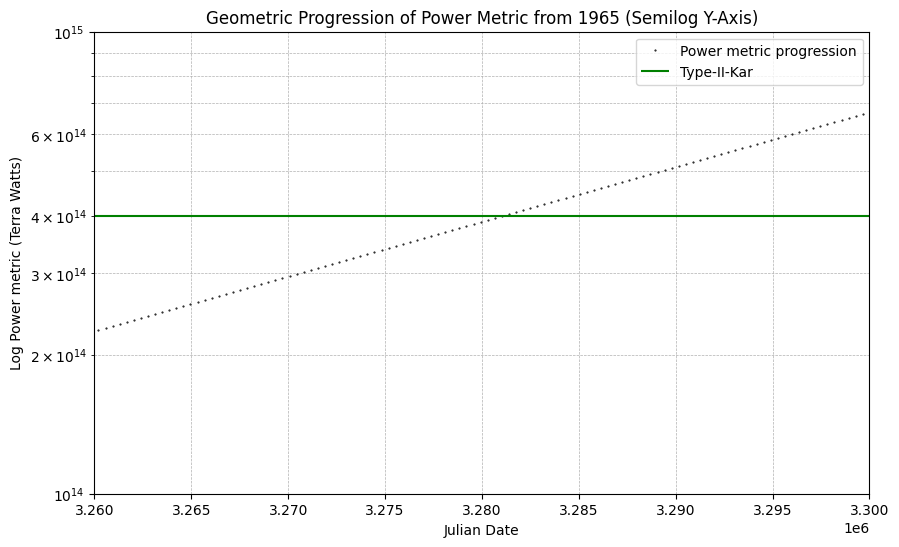

The JD to for the geometric to cross is 3.282E6, and it does this in about 2308.6611909650924 years from 1965


In [187]:
# geometric analysis
# Redefining the initial parameters and data arrays
initial_power_yearly = 43307.87  # Terra Watts (in 1965)
growth_rate_yearly = 1  # Percent per year
initial_julian_date = 2438761.5
initial_year = 1965
years_array = list(range(initial_year, 1965+3200))
power_array = [initial_power_yearly * (1 + growth_rate_yearly / 100) ** (year - initial_year) for year in years_array]
julian_date_array = [initial_julian_date + 365.25 * (year - initial_year) for year in years_array]

# Plotting the Power metric vs. Julian Date with black circles for data points and a semilog y-axis
plt.figure(figsize=(10, 6))
plt.semilogy(julian_date_array, power_array, '.', ms=1, color='black', label='Power metric progression')
plt.xlabel('Julian Date')
plt.ylabel('Log Power metric (Terra Watts)')
plt.title('Geometric Progression of Power Metric from 1965 (Semilog Y-Axis)')
plt.hlines(4.0E14,2438761.5,2438761.5+5000*365.25, label=("Type-II-Kar"),color='g')
plt.xlim(3.26E6,3.3E6)
plt.ylim(1E14,1E15)

plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.show()
print(f'The JD to for the geometric to cross is 3.282E6, and it does this in about {(3.282E6-2438761.5)/365.25} years from 1965')

In [184]:
#Tn = P0 (1+r/100)^n
#note Kardashev 1964 writes: "that current expenditure of energy is 4x10^19 erg/s" or 4 TW
#P0= 43307.87 TW
r= 1
n=2310
43307.87*(1+1/100)**2310, 4*(1+1/100)**(3200),(4*(1+1/100)**(3200))/(43307.87*(1+1/100)**2310)


(415853405512084.06, 269436293683021.34, 0.6479117162723149)